In [23]:
!pip install pandas
import pandas as pd

# Load data
trades = pd.read_csv("historical_data.csv")
sentiment = pd.read_csv("greed_index.csv")

# Display first few rows
trades.head(), sentiment.head()



[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


(                                      Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
 3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
 4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   
 
    Closed PnL                                   Transaction Hash     Order ID  \
 0      

In [24]:
# Convert timestamp columns to datetime
trades["Timestamp IST"] = pd.to_datetime(trades["Timestamp IST"], dayfirst=True, errors='coerce')

sentiment["date"] = pd.to_datetime(sentiment["date"])

# Add a 'date' column to trades to match with sentiment
trades["date"] = trades["Timestamp IST"].dt.date


In [25]:
daily_stats = trades.groupby("date").agg({
    "Closed PnL": "mean",
    "Execution Price": "mean",
    "Size USD": "sum",
    "Size Tokens": "sum",
    "Fee": "sum",
    "Side": lambda x: x.value_counts().to_dict()  
}).reset_index()


In [26]:
daily_stats["date"] = pd.to_datetime(daily_stats["date"])
sentiment["date"] = pd.to_datetime(sentiment["date"])


In [27]:
merged_df = pd.merge(daily_stats, sentiment, how="left", on="date")
merged_df.head()

,date,Closed PnL,Execution Price,Size USD,Size Tokens,Fee,Side,timestamp,value,classification
0,2023-05-01,0.000000,1898.133333,477.00,0.25130,0.000000,{'BUY': 3},1.682919e+09,63.0,Greed
1,2023-12-05,0.000000,11038.300000,50005.83,11.80901,12.501455,"{'BUY': 7, 'SELL': 2}",1.701754e+09,75.0,Extreme Greed
2,2023-12-14,-18.675885,8031.868818,113203.35,4092.28901,28.300831,"{'SELL': 6, 'BUY': 5}",1.702532e+09,72.0,Greed
3,2023-12-15,-12.316017,2.982000,10609.95,3558.00000,2.652489,{'BUY': 2},1.702618e+09,70.0,Greed
4,2023-12-16,0.000000,0.384707,15348.77,39897.00000,3.837189,{'BUY': 3},1.702705e+09,67.0,Greed


In [28]:
!pip install seaborn
!pip install matplotlib


[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


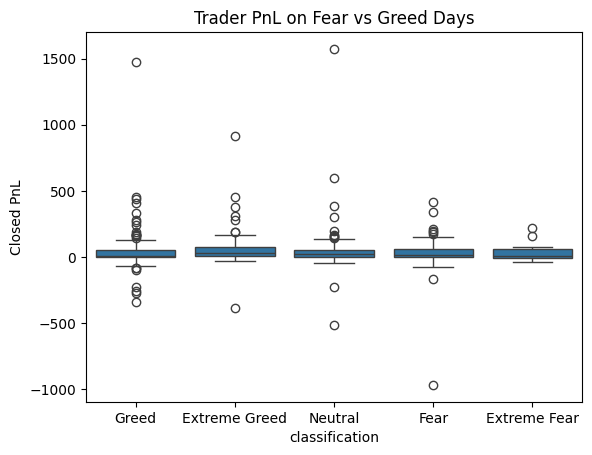

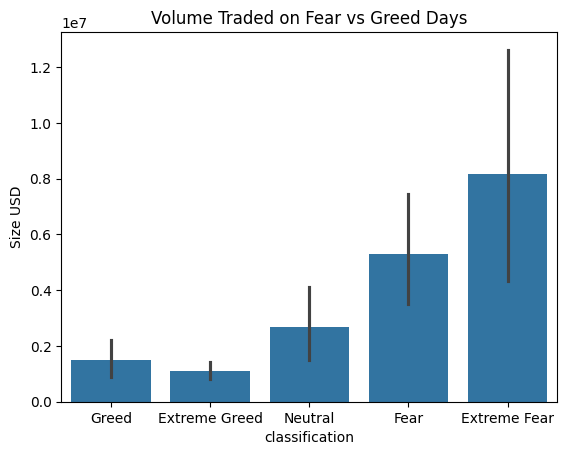

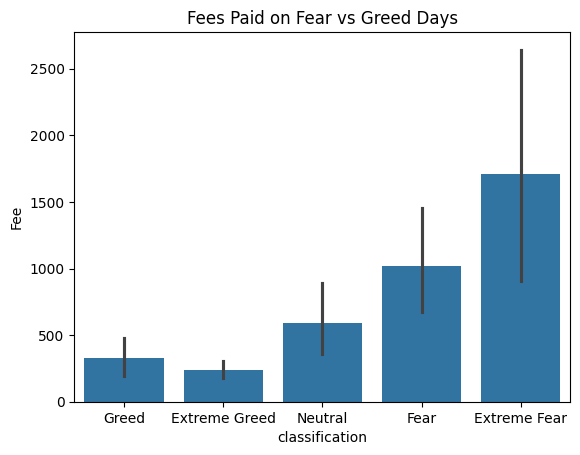

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# PnL vs Sentiment
sns.boxplot(data=merged_df, x="classification", y="Closed PnL")
plt.title("Trader PnL on Fear vs Greed Days")
plt.show()

# Volume vs Sentiment
sns.barplot(data=merged_df, x="classification", y="Size USD")
plt.title("Volume Traded on Fear vs Greed Days")
plt.show()

sns.barplot(data=merged_df, x="classification", y="Fee")
plt.title("Fees Paid on Fear vs Greed Days")
plt.show()


# Trader Behavior vs Bitcoin Market Sentiment

## Objective

The goal of this project is to explore how trader behavior relates to Bitcoin market sentiment, using two datasets:

1. Bitcoin Fear/Greed Index - daily classification of market sentiment
2. Historical trading data from Hyperliquid - including execution prices, trade sides, size, PnL, and fees

By merging these datasets on date, I analyzed whether sentiment (fear or greed) has a measurable impact on how traders perform, how much they trade, and what they pay in fees.

## Data Overview

The historical trading dataset includes columns like:
- Account
- Coin
- Execution Price
- Size USD
- Side (Buy/Sell)
- Timestamp
- Closed PnL
- Fee

The sentiment dataset includes:
- Date
- Value (numeric index)
- Classification (Extreme Fear, Fear, Neutral, Greed, Extreme Greed)

## Methodology

- Loaded both datasets and converted timestamps to a consistent datetime format
- Aggregated the trading data by day to calculate:
  - Average PnL
  - Total volume traded
  - Total fees paid
- Merged aggregated trader data with the daily sentiment classification
- Created visual comparisons to analyze trends across different sentiment levels

## Key Insights

1. Trader PnL is mostly stable across sentiment levels.  
   On average, trader profitability does not show a strong difference between fear and greed days. This suggests that experienced traders may not be overly influenced by market sentiment.

2. Trading volume is significantly higher on Fear and Extreme Fear days.  
   Volume traded increases steadily from greed to fear, with the highest volume observed on days classified as Extreme Fear. This indicates traders are more active during market uncertainty, possibly due to volatility or attempts to capitalize on dips.

3. Fees paid also increase on Fear and Extreme Fear days.  
   The total fees paid by traders rise alongside trading volume. Higher fees may reflect more frequent trades or reactive strategies during high-sentiment volatility.

## Tools and Libraries Used

- Python
- Pandas
- Matplotlib
- Seaborn
- Jupyter Notebook

## How to Use

Clone this repository, open the notebook file (assignment.ipynb), and run the cells in order. All data exploration and visualizations are included inline in the notebook.

## Author

Saswat Kumar Panda  
Applied for: Junior Data Scientist - Trader Behavior Insights
